In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


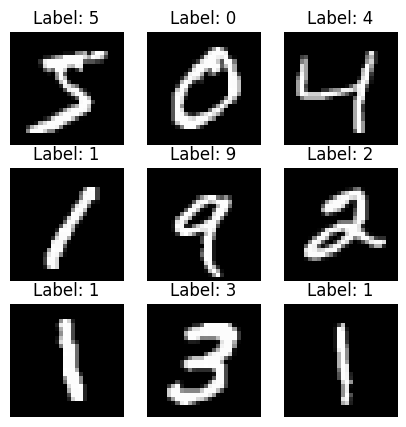

In [ ]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [10]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test)
)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 107ms/step - accuracy: 0.7997 - loss: 0.6273 - val_accuracy: 0.9805 - val_loss: 0.0595
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 103ms/step - accuracy: 0.9702 - loss: 0.0996 - val_accuracy: 0.9856 - val_loss: 0.0433
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 106ms/step - accuracy: 0.9785 - loss: 0.0716 - val_accuracy: 0.9880 - val_loss: 0.0340
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.9830 - loss: 0.0546 - val_accuracy: 0.9892 - val_loss: 0.0334
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 103ms/step - accuracy: 0.9854 - loss: 0.0491 - val_accuracy: 0.9908 - val_loss: 0.0275
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.9872 - loss: 0.0415 - val_accuracy: 0.9911 - val_loss: 0.0269
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 107ms/step - accuracy: 0.9880 - loss: 0.0363 - val_accuracy: 0.9919 - val_loss: 0.0227
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 100ms/step - accuracy: 0.9902 - loss: 0

In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9892 - loss: 0.0313
Test Accuracy: 0.9918000102043152


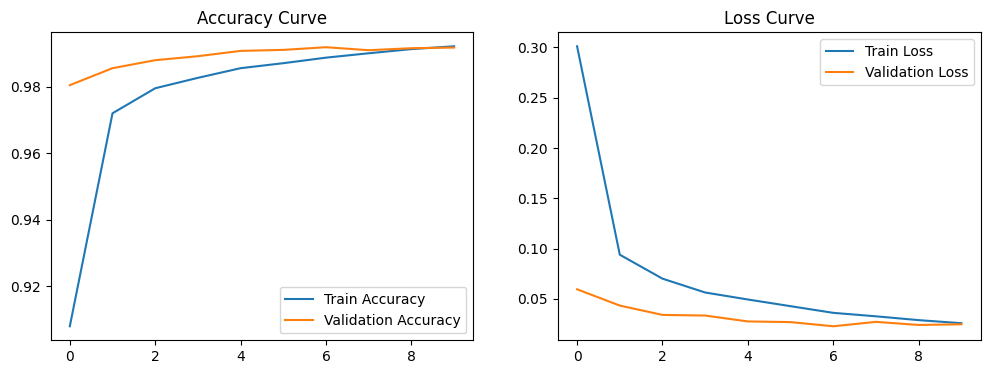

In [12]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Predicted Digit: 7


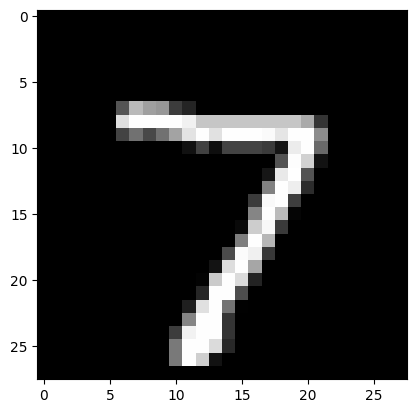

In [13]:
prediction = model.predict(x_test)

plt.imshow(x_test[0].reshape(28,28), cmap='gray')
print("Predicted Digit:", np.argmax(prediction[0]))


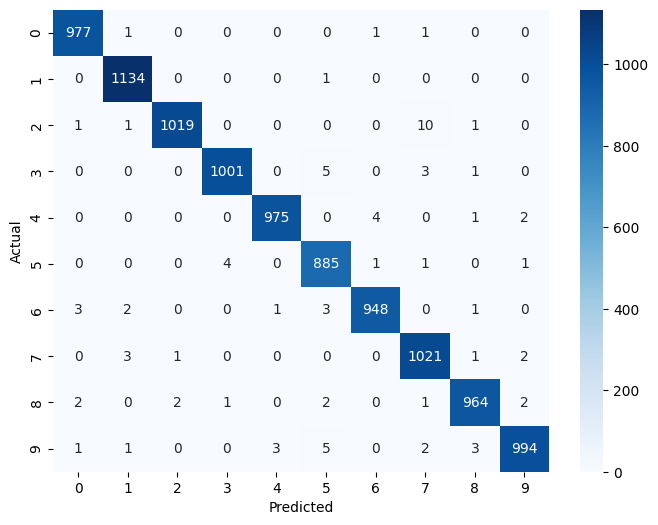

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = np.argmax(prediction, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:
model.save("mnist_digit_model.h5")


In [16]:
!pip install streamlit streamlit-drawable-canvas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.6 MB/s eta 0:00:00


In [17]:
import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model
from streamlit_drawable_canvas import st_canvas
from PIL import Image

st.title("Handwritten Digit Recognition")

model = load_model("mnist_digit_model.h5")

canvas = st_canvas(
    fill_color="black",
    stroke_width=10,
    stroke_color="white",
    background_color="black",
    width=280,
    height=280,
    drawing_mode="freedraw",
    key="canvas",
)

if st.button("Predict"):
    if canvas.image_data is not None:
        img = canvas.image_data
        img = Image.fromarray(img.astype('uint8')).convert('L')
        img = img.resize((28, 28))
        img = np.array(img) / 255.0
        img = img.reshape(1, 28, 28, 1)

        prediction = model.predict(img)
        st.write("### Predicted Digit:", np.argmax(prediction))


2026-01-08 05:08:18.251 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-08 05:08:18.258 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-08 05:08:18.514 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-01-08 05:08:18.518 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-08 05:08:18.522 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-08 05:08:18.731 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-08 05:08:18.735 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-08 05:08:18.736 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running 

In [19]:
!pip install streamlit streamlit-drawable-canvas pyngrok


In [20]:
%%writefile app.py
import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model
from streamlit_drawable_canvas import st_canvas
from PIL import Image

st.title("Handwritten Digit Recognition")

model = load_model("mnist_digit_model.h5")

canvas = st_canvas(
    fill_color="black",
    stroke_width=10,
    stroke_color="white",
    background_color="black",
    width=280,
    height=280,
    drawing_mode="freedraw",
    key="canvas",
)

if st.button("Predict"):
    if canvas.image_data is not None:
        img = canvas.image_data
        img = Image.fromarray(img.astype("uint8")).convert("L")
        img = img.resize((28, 28))
        img = np.array(img) / 255.0
        img = img.reshape(1, 28, 28, 1)

        prediction = model.predict(img)
        st.success(f"Predicted Digit: {np.argmax(prediction)}")


Writing app.py


In [21]:
!streamlit run app.py & npx localtunnel --port 8501




⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.229.105.145:8501

  Stopping...
^C


In [22]:
!ls

app.py	mnist_digit_model.h5  sample_data


In [23]:
from google.colab import files

files.download("app.py")
files.download("mnist_digit_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>